In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../../..')
from gp2 import Runner

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:

R = Runner(verbose=True)

*** GP2  Unet ***
Working directory: /tmp/tmpge_vo6u2GP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')

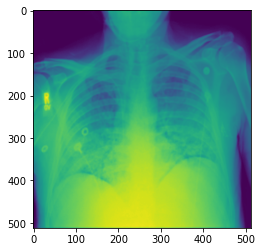

In [5]:
plt.imshow(images[500])

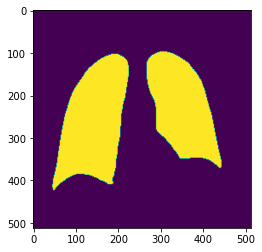

In [6]:
plt.imshow(masks[500])

In [7]:
len(images)

6012

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
#
#
R.setup_data(images, masks, dataset_size=6012, weights=weights)

Weights OK!


In [10]:
RUNS = 5

In [11]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
5/5 [==============================] - 32s 4s/step - loss: 1.3350 - dice_coeff: 0.3712 - val_loss: 1.3876 - val_dice_coeff: 0.3059
Epoch 2/100
5/5 [==============================] - 7s 1s/step - loss: 1.1218 - dice_coeff: 0.4439 - val_loss: 1.3882 - val_dice_coeff: 0.3074
Epoch 3/100
5/5 [==============================] - 7s 1s/step - loss: 0.9890 - dice_coeff: 0.4935 - val_loss: 1.3918 - val_dice_coeff: 0.3089
Epoch 4/100
5/5 [==============================] - 7s 1s/step - loss: 0.9157 - dice_coeff: 0.5201 - val_loss: 1.3964 - val_dice_coeff: 0.3098
Epoch 5/100
5/5 [==============================] - 7s 1s/step - loss: 0.8492 - dice_coeff: 0.5488 - val_loss: 1.4014 - val_dice_coeff: 0.3102
Epoch 6/100
5/5 [==============================] - 7s 1s/step - loss: 0.8105 - dice_coeff: 0.5650 - val_loss: 1.4057 - val_dice_coeff: 0.3107
Epoch 7/100
5/5 [==============================] - 7s 1s/step - loss: 0.7655 - dice_coeff: 0.5851 - val_loss: 1.4096 - val_dice_coeff: 0

In [12]:
R.classifier_scores

[[1.2858726978302002, 0.2921049892902374],
 [1.24765145778656, 0.29213693737983704],
 [1.0491243600845337, 0.4034401476383209],
 [0.7706333994865417, 0.5622080564498901],
 [1.1049890518188477, 0.6414260268211365]]

In [13]:
R.discriminator_scores

[[0.0, 1.0],
 [35.87605285644531, 0.6888889074325562],
 [298.49951171875, 0.5249999761581421],
 [553.1653442382812, 0.49166667461395264],
 [866.7464599609375, 0.5083333253860474]]

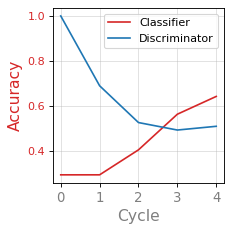

In [14]:
R.plot()